# Example 1: Query a table with SQL and magic commands

In [ ]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project group9finalproject
SELECT * FROM `group9finalproject.Uber_group9.trip_kmeans` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,trip_id,distance,duration,pay_base,pay_tolls,pay_congestion,pay_airport,pay_tips,shared_request_flag,shared_match_flag,...,on_scene_time,pickup_date,pickup_time,dropoff_date,dropoff_time,weather_sunrise,sunrise_time,weather_temp,weather_precipitation,weather_wind
0,171545f8-59d3-48de-9285-631add3e7da4,1.78,610,10.19,0.0,2.75,0.0,0.00,False,False,...,20:27,2022-07-19,20:28,2022-07-19,20:38,True,04:00,27.4,0.0,9.6
1,9ab5758f-5c8c-48af-9ef0-120172245052,4.29,1080,16.82,0.0,0.00,0.0,0.00,False,False,...,20:43,2022-07-22,20:45,2022-07-22,21:03,True,04:00,26.5,0.0,5.1
2,48428130-333e-4fb5-93af-43cbd02d4820,1.72,478,10.61,0.0,0.00,0.0,0.00,False,False,...,22:00,2022-03-19,22:01,2022-03-19,22:09,True,06:00,13.0,3.2,5.8
3,16bfbf85-edf2-48d7-a4b9-a4db4d65fc39,3.02,723,12.40,0.0,2.75,0.0,0.00,False,False,...,21:54,2022-04-20,21:55,2022-04-20,22:07,True,05:00,6.2,0.0,6.9
4,4d5caa96-0abe-4795-a660-3cf9e36a6ecd,8.17,1260,19.80,0.0,2.75,0.0,2.49,False,False,...,22:28,2022-08-17,22:29,2022-08-17,22:50,True,05:00,19.8,0.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853773,2ee0476f-10a0-4d18-9003-2e44d77b0493,5.75,1247,38.36,0.0,2.75,0.0,0.00,False,False,...,02:02,2022-02-18,02:06,2022-02-18,02:26,False,06:00,11.8,3.0,40.7
14853774,db36149c-a640-4a1e-8e9d-de8cb3fb8430,1.13,264,8.74,0.0,0.00,0.0,0.00,False,False,...,01:28,2022-11-04,01:32,2022-11-04,01:36,False,06:00,8.8,0.0,8.6
14853775,33c1b326-f0bf-4b8f-ba2c-5168ddaeb1d2,11.71,1489,39.21,0.0,0.00,2.5,0.00,False,False,...,00:56,2022-11-14,00:59,2022-11-14,01:24,False,06:00,4.2,0.0,15.0
14853776,668d1308-9ee4-4706-9996-ddf3427fd5d5,1.13,346,8.15,0.0,0.00,0.0,0.00,False,False,...,03:00,2022-08-09,03:01,2022-08-09,03:07,False,05:00,27.0,0.0,19.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

df = results

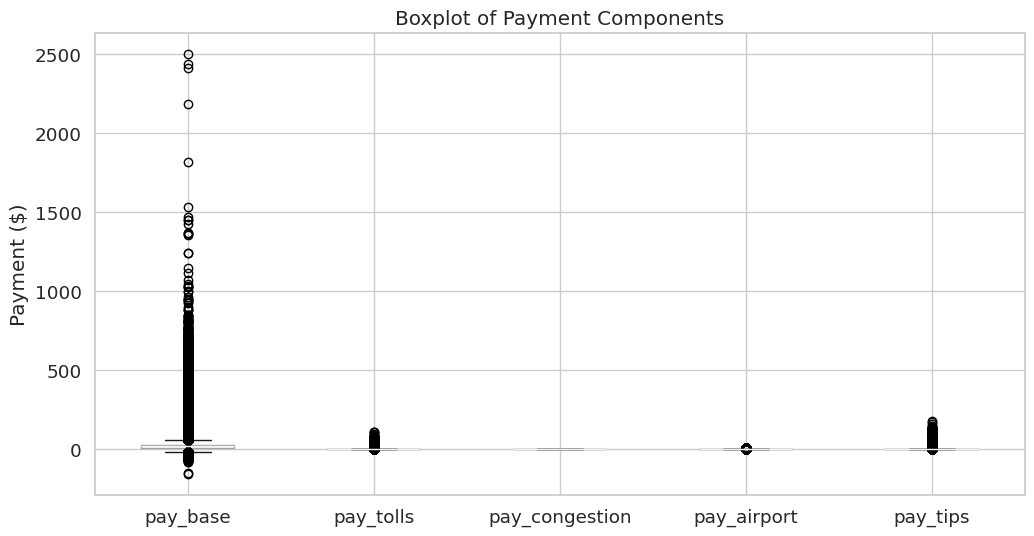

In [ ]:
pay_columns = ['pay_base', 'pay_tolls', 'pay_congestion', 'pay_airport', 'pay_tips']
df[pay_columns].boxplot(figsize=(12, 6))
plt.title('Boxplot of Payment Components')
plt.ylabel('Payment ($)')
plt.show()

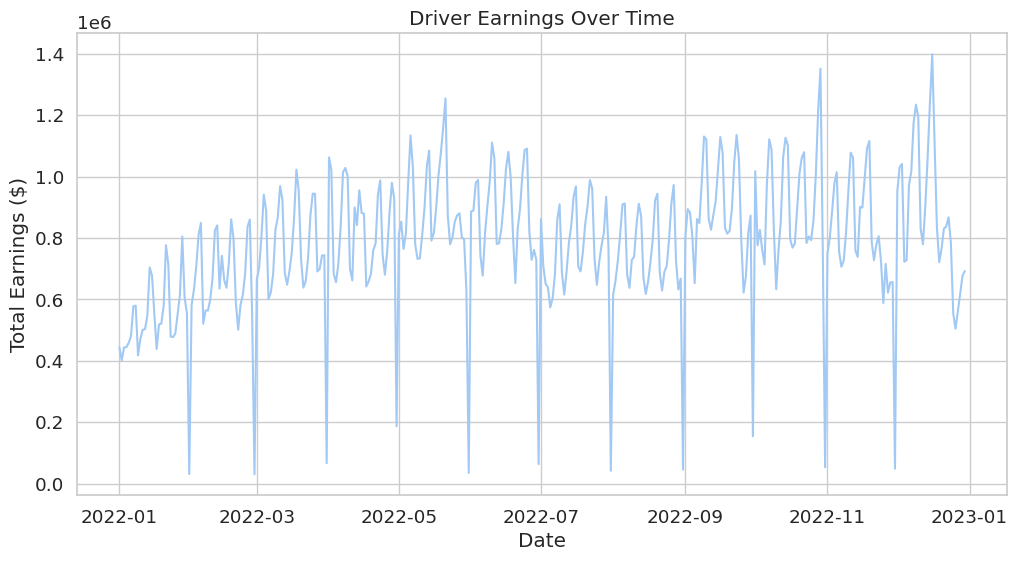

In [ ]:
df['request_date'] = pd.to_datetime(df['request_date'])
daily_earnings = df.groupby('request_date')['driver_earnings'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_earnings, x='request_date', y='driver_earnings')
plt.title('Driver Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Earnings ($)')
plt.show()

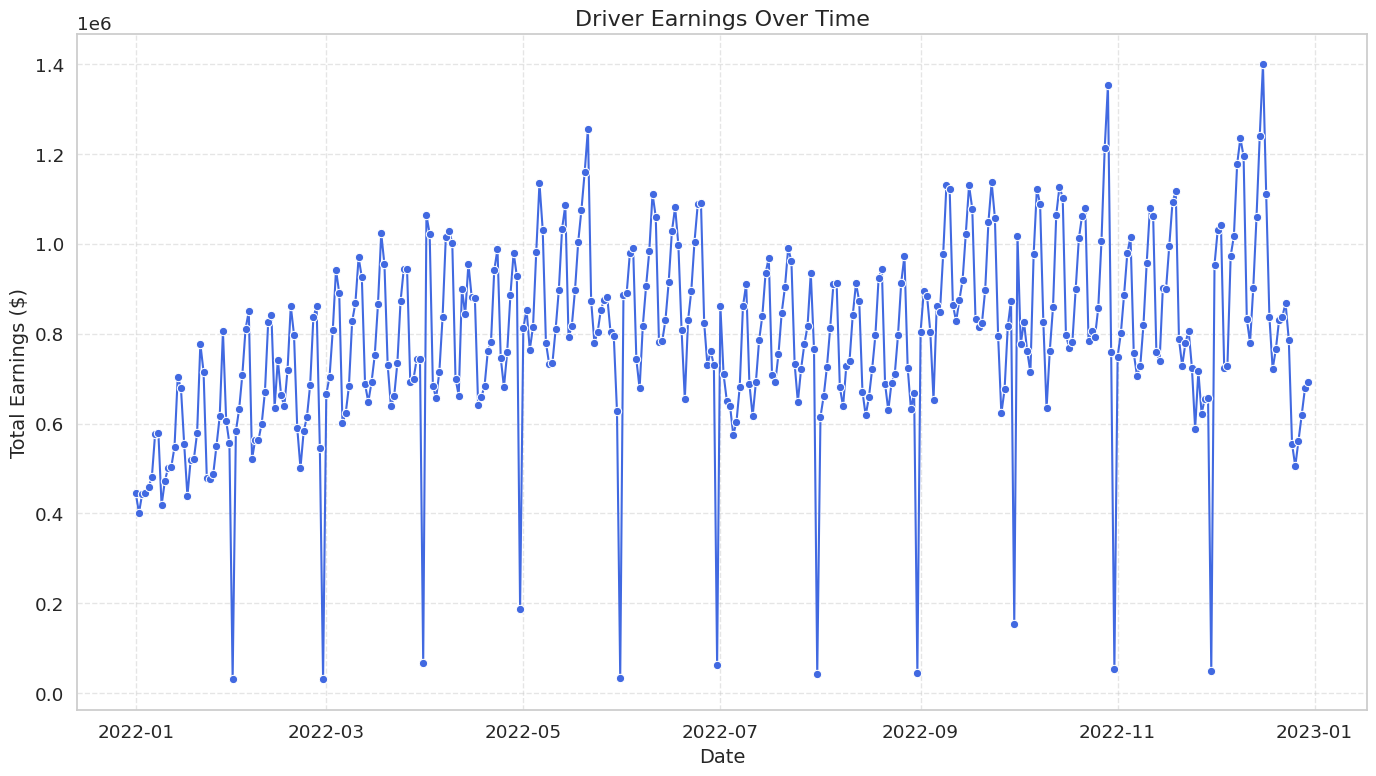

In [ ]:
df['request_date'] = pd.to_datetime(df['request_date'])
daily_earnings = df.groupby('request_date')['driver_earnings'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_earnings, x='request_date', y='driver_earnings', marker="o", color="royalblue")
plt.title('Driver Earnings Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Earnings ($)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

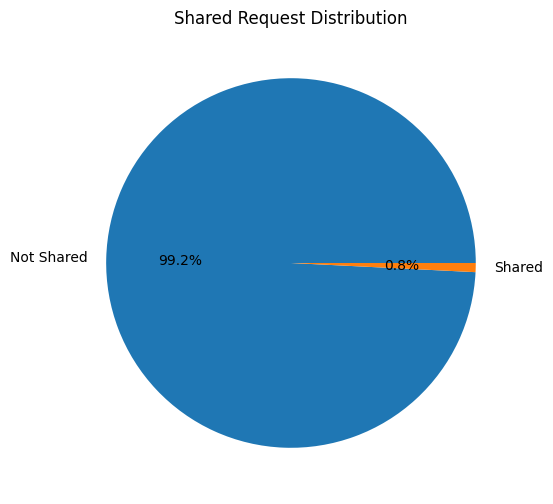

In [ ]:
shared_flag_counts = df['shared_request_flag'].value_counts()

plt.figure(figsize=(8, 6))
shared_flag_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Shared', 'Shared'])
plt.title('Shared Request Distribution')
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weather_temp', y='distance', alpha=0.6)
plt.title('Trip Distance vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Distance (miles)')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='weather_temp', y='distance', hue='weather_precipitation', size='weather_wind',
                sizes=(20, 200), palette='coolwarm', alpha=0.4, edgecolor='white')
plt.title('Trip Distance vs. Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Distance (miles)', fontsize=14)
plt.legend(title="Precipitation & Wind", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()